In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#LOADING THE DATASET
parkinsons_ds  = pd.read_csv("/content/parkinsons.csv")


In [7]:
 #STUDYING THE COLUMNS
 ps_names = parkinsons_ds.columns
ps_names


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [8]:
#checking for nullity
nulls = parkinsons_ds.isnull().sum()
nulls

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

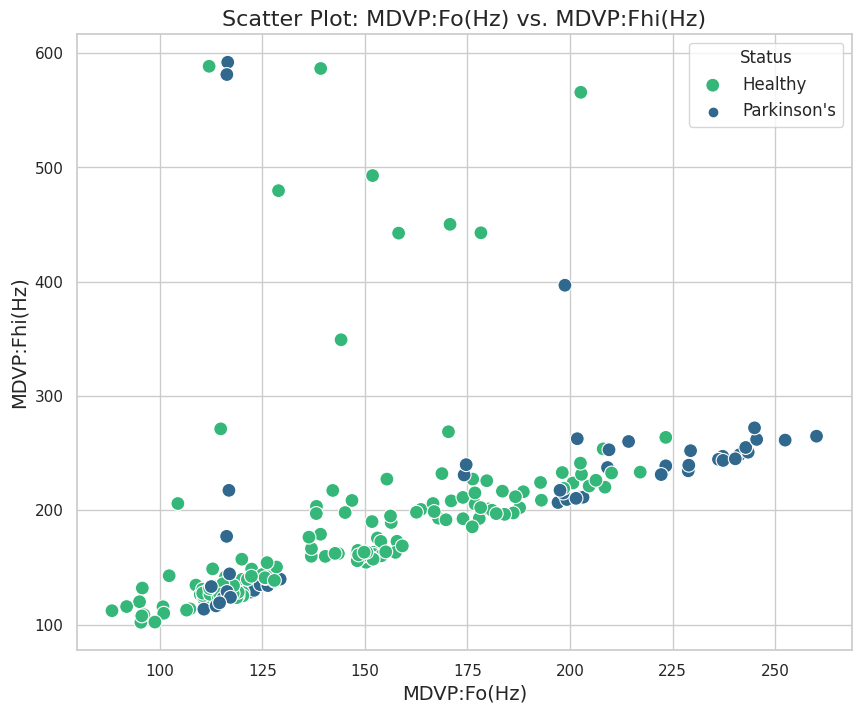

In [10]:
#scatter plot for two numeric values
# Take any 2 features from your project having has real numeric values. Make a scatter plot of the
#data and observe the pattern.

import seaborn as sns
import matplotlib.pyplot as plt



# Set the style of the plot
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='MDVP:Fo(Hz)', y='MDVP:Fhi(Hz)', data=parkinsons_ds, hue='status', palette='viridis', s=100)
plt.title('Scatter Plot: MDVP:Fo(Hz) vs. MDVP:Fhi(Hz)', fontsize=16)
plt.xlabel('MDVP:Fo(Hz)', fontsize=14)
plt.ylabel('MDVP:Fhi(Hz)', fontsize=14)
plt.legend(title='Status', loc='upper right', labels=['Healthy', 'Parkinson\'s'], title_fontsize=12, fontsize=12)
plt.show()


In [11]:
# Create a linear regression model on this data. Consider using one feature as independent
#variable while the other as dependent variable (you may also round this number to integer). After
#the model is created, calculate the mean square error by predicting the values from the model.
#Refer site: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html.

#1. linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Define your features (pollutant measurements) and target variable (AQI)
X = parkinsons_ds[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
y = parkinsons_ds['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)

# You can also print the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 0.12655291699735474
Mean Absolute Error: 0.2718603270317417
R-squared (R2) Score: 0.14068309485278307
Coefficients: [-2.93525393e-03 -2.48524451e-04 -1.54970117e-03 -2.83101929e+02
 -3.10870464e+03  1.23839345e+03  5.49438876e+01 -2.73838477e+02
  4.00335275e+01  1.90561448e-01  9.50545410e+03 -4.00805849e+01
 -2.57726986e+00 -3.17675263e+03 -2.43582582e+00 -1.57860361e-02
 -1.03408785e+00  4.78060604e-01  8.03097747e-02  1.28214062e+00
  1.01409452e-01  1.75257346e+00]
Intercept: 1.8211092777038829


In [13]:
#logistic regression for this data
#. Using the training set available for your project, train a logistic regression classifier. Use this
#classifier to evaluate your test set accuracy. Study the various parameters associated with logistic
#regression model and the role they play in the model training.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have your dataset loaded as a DataFrame
# For example, if your DataFrame is named 'parkinsons_data'

# Separate target variable 'status' and dependent variables
X = parkinsons_ds.drop(columns=['status', 'name'])  # Features
y = parkinsons_ds['status']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have already trained and tested your logistic regression model

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate AUC-ROC score (only applicable if you have predicted probabilities)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (Parkinson's)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")



Accuracy: 0.90
Confusion Matrix:
 [[ 3  4]
 [ 0 32]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39

Accuracy: 0.90
Precision: 0.89
Recall: 1.00
F1-score: 0.94
AUC-ROC: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
#se a Regression Tree and k-NN Regressor for value prediction. Use the data employed for A1.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Define your features (pollutant measurements) and target variable (AQI)
X = parkinsons_ds[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']]
y = parkinsons_ds['status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN regression model
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the KNN regression model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("K-Nearest Neighbors (KNN) Regressor Evaluation:")
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2) Score:", r2)


K-Nearest Neighbors (KNN) Regressor Evaluation:
Mean Squared Error: 0.17743589743589747
Mean Absolute Error: 0.2512820512820513
R-squared (R2) Score: -0.20482142857142893
